In [72]:
#Análise Multivarada de dados considerando as características das observações.
# Gerar ao menos 3 gráficos associados e fazer a descrição.

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import pi
from matplotlib.pyplot import fill_between
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [172]:
# CARREGANDO OS DADOS - USANDO PANDAS READ_CSV
df = pd.read_csv('.\\WineQT.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [173]:
# EXPLORANDO OS DADOS E TRATANDO
df = df.iloc[:,:-1]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [174]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [177]:
correlation_matrix = df.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


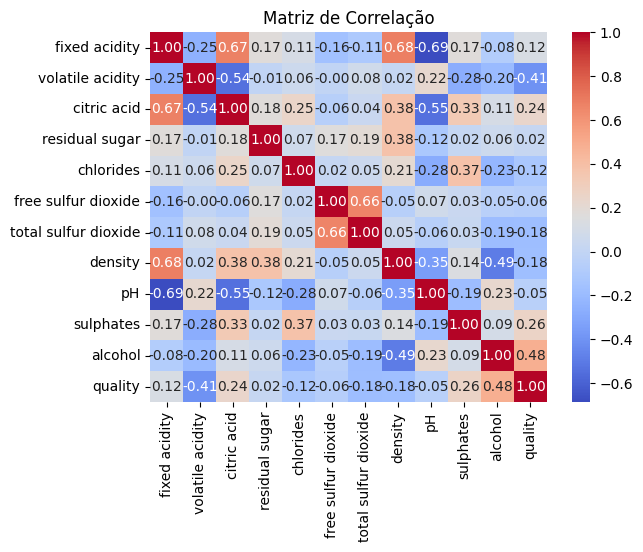

In [178]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [218]:
# PELA MATRIZ PERCEBI QUE O ALCHOL, SULPHATES E FIXED ACIDITY ESTÃO RELACIONADOS AO QUALIDADE NO FINAL
df = df[['alcohol','sulphates','fixed acidity','citric acid','residual sugar','chlorides','volatile acidity','free sulfur dioxide','total sulfur dioxide','density','pH','quality']]

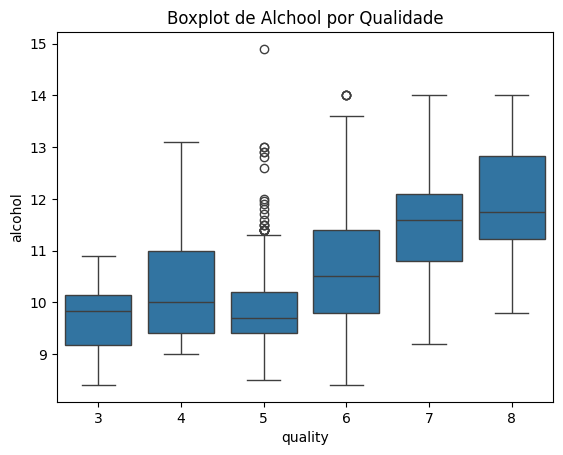

In [204]:
# PERCEBEMOS QUE QUE QUANDO O ALCHOOL ESTÁ NA MEDIA DE 12 O VINHO É MELHOR QUALIFICADO
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Boxplot de Alchool por Qualidade')
plt.show()

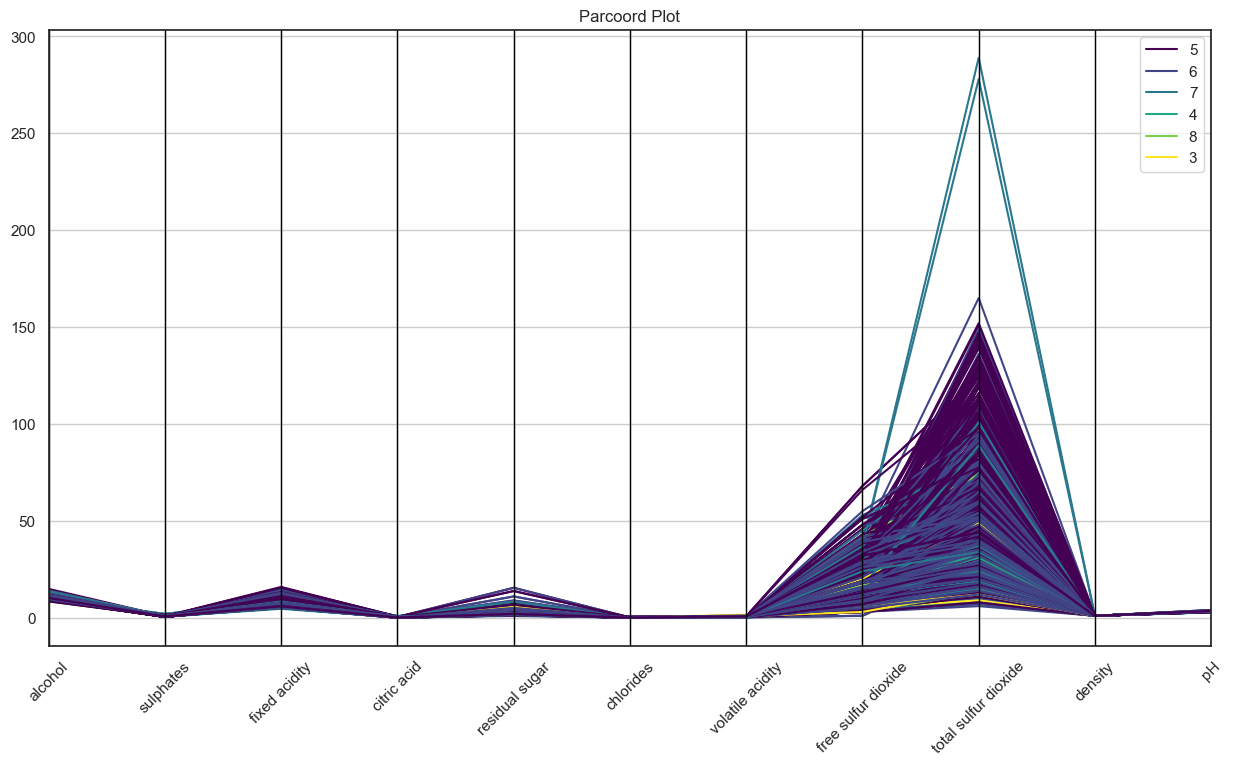

In [243]:
#PARECE QUE O ENXOFRE ACABA TIRANDO A QUALIDADE DO VINHO
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15, 8))
parallel_coordinates(df, 'quality', colormap='viridis')
plt.title('Parcoord Plot')
plt.xticks(rotation=45)
plt.show()

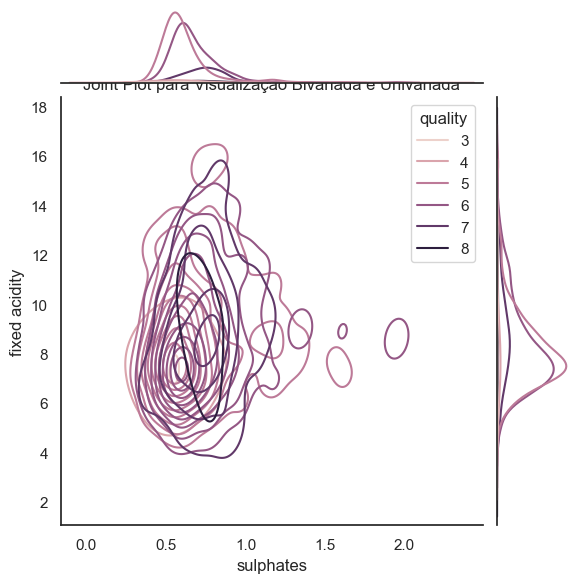

In [244]:
#SULFATO 1 PARA 10 DE FIXED ACID AJUDA NA QUALIDADE FINAL
sns.jointplot(x='sulphates', y='fixed acidity', hue='quality', data=df, kind='kde')
plt.title('Joint Plot para Visualização Bivariada e Univariada')
plt.show()

In [245]:
y = df['quality']
x = df.iloc[:,:-1]
x.head()


,alcohol,sulphates,fixed acidity,citric acid,residual sugar,chlorides,volatile acidity,free sulfur dioxide,total sulfur dioxide,density,pH
0,9.4,0.56,7.4,0.00,1.9,0.076,0.70,11.0,34.0,0.9978,3.51
1,9.8,0.68,7.8,0.00,2.6,0.098,0.88,25.0,67.0,0.9968,3.20
2,9.8,0.65,7.8,0.04,2.3,0.092,0.76,15.0,54.0,0.9970,3.26
3,9.8,0.58,11.2,0.56,1.9,0.075,0.28,17.0,60.0,0.9980,3.16
4,9.4,0.56,7.4,0.00,1.9,0.076,0.70,11.0,34.0,0.9978,3.51


In [246]:
x_std = scale(x)

In [247]:
df_x = pd.DataFrame(x_std)
df_x.columns = x.columns
df_x.head()

,alcohol,sulphates,fixed acidity,citric acid,residual sugar,chlorides,volatile acidity,free sulfur dioxide,total sulfur dioxide,density,pH
0,-0.963382,-0.573658,-0.521580,-1.365027,-0.466421,-0.231395,0.939332,-0.450467,-0.363610,0.555854,1.270695
1,-0.593601,0.130881,-0.292593,-1.365027,0.050060,0.234247,1.941813,0.915920,0.643477,0.036165,-0.708928
2,-0.593601,-0.045254,-0.292593,-1.161568,-0.171289,0.107253,1.273492,-0.060071,0.246745,0.140103,-0.325775
3,-0.593601,-0.456235,1.653789,1.483400,-0.466421,-0.252560,-1.399789,0.135127,0.429852,0.659792,-0.964363
4,-0.963382,-0.573658,-0.521580,-1.365027,-0.466421,-0.231395,0.939332,-0.450467,-0.363610,0.555854,1.270695


In [248]:
df_x.describe().round(2)

,alcohol,sulphates,fixed acidity,citric acid,residual sugar,chlorides,volatile acidity,free sulfur dioxide,total sulfur dioxide,density,pH
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.89,-1.92,-2.12,-1.37,-1.20,-1.59,-2.29,-1.43,-1.22,-3.46,-3.65
25%,-0.87,-0.63,-0.69,-0.91,-0.47,-0.36,-0.77,-0.84,-0.76,-0.60,-0.68
50%,-0.22,-0.22,-0.24,-0.09,-0.25,-0.17,-0.06,-0.26,-0.27,-0.03,-0.01
75%,0.61,0.42,0.45,0.77,0.05,0.06,0.61,0.53,0.46,0.58,0.57
max,4.12,7.88,4.34,3.72,9.57,11.09,5.84,5.11,7.42,3.62,4.46


In [249]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               1143 non-null   float64
 1   sulphates             1143 non-null   float64
 2   fixed acidity         1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   volatile acidity      1143 non-null   float64
 7   free sulfur dioxide   1143 non-null   float64
 8   total sulfur dioxide  1143 non-null   float64
 9   density               1143 non-null   float64
 10  pH                    1143 non-null   float64
dtypes: float64(11)
memory usage: 98.4 KB


In [250]:
pca = PCA()
pca.fit(df_x)

PCA()

In [251]:
df_pca = pd.DataFrame(pca.fit_transform(df_x))
df_pca

,0,1,2,3,4,5,6,7,8,9,10
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,-0.906815,0.122336,-0.330086,0.011548,0.249611,0.046465
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,0.860406,0.998623,0.746939,-0.547644,-0.005196,-0.134810
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,0.356702,0.536162,0.575652,-0.084118,0.203715,-0.122553
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,-0.154720,-0.300410,-0.494589,0.110087,0.121798,0.313678
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,-0.906815,0.122336,-0.330086,0.011548,0.249611,0.046465
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.442233,0.332152,1.137812,0.441063,0.232027,-0.499123,0.185077,0.061655,-0.867211,-0.217315,-0.381995
1139,-1.222998,0.921618,0.027234,0.855285,-0.155510,-1.130942,0.605893,0.364230,-0.868018,-0.581082,0.007893
1140,-2.124635,0.873804,0.626573,0.399466,-0.177268,0.063081,-0.221032,-0.357601,-1.008091,-0.296691,-0.033930
1141,-2.208536,0.928343,1.815403,0.339723,0.189002,-0.665644,0.539637,-0.269461,-1.150577,-0.436506,-0.215402


In [252]:
df_pca.columns = [f'PC{i}' for i in range(1,df_pca.shape[1] + 1)]
df_pca['quality'] = y
df_pca.head().round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,quality
0,-1.5615,0.4449,-1.7672,0.1326,0.1301,-0.9068,0.1223,-0.3301,0.0115,0.2496,0.0465,5
1,-0.7609,1.9151,-0.8642,0.5369,0.0909,0.8604,0.9986,0.7469,-0.5476,-0.0052,-0.1348,5
2,-0.7081,0.9144,-1.1424,0.4351,0.0249,0.3567,0.5362,0.5757,-0.0841,0.2037,-0.1226,5
3,2.3082,-0.2244,0.2569,-0.8306,-1.6392,-0.1547,-0.3004,-0.4946,0.1101,0.1218,0.3137,6
4,-1.5615,0.4449,-1.7672,0.1326,0.1301,-0.9068,0.1223,-0.3301,0.0115,0.2496,0.0465,5


<Axes: xlabel='PC1', ylabel='PC2'>

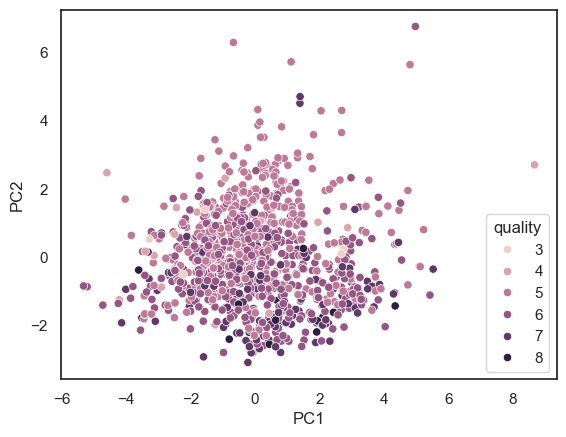

In [253]:
fig, ax = plt.subplots()
sns.scatterplot(data = df_pca, x = 'PC1', y = 'PC2', hue = 'quality', ax = ax)

<Axes: xlabel='PC3', ylabel='PC4'>

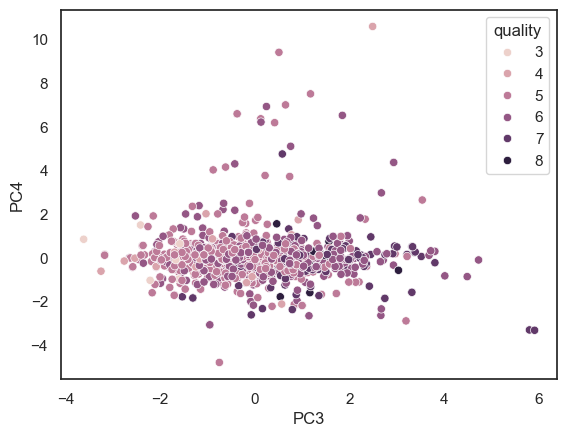

In [254]:
fig, ax = plt.subplots()
sns.scatterplot(data = df_pca, x = 'PC3', y = 'PC4', hue = 'quality', ax = ax)

<Axes: xlabel='PC5', ylabel='PC6'>

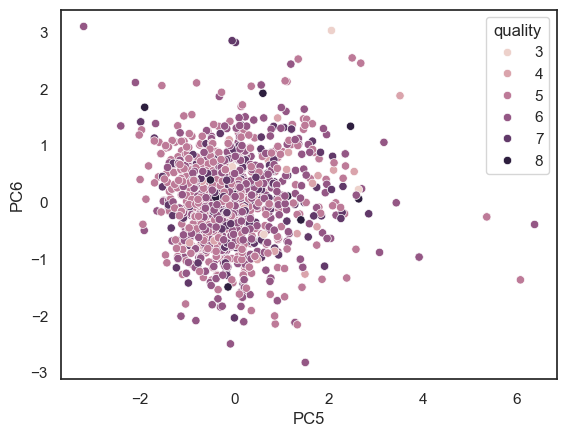

In [255]:
fig, ax = plt.subplots()
sns.scatterplot(data = df_pca, x = 'PC5', y = 'PC6', hue = 'quality', ax = ax)

In [257]:
# 5 PRIMEIROS COMPONENTE EXPLICA 80% DO MEU DATASET
pca.explained_variance_ratio_.cumsum()

array([0.28692345, 0.45767448, 0.60073377, 0.71087056, 0.79798089,
       0.85846899, 0.90915967, 0.94725592, 0.97857355, 0.9946855 ,
       1.        ])

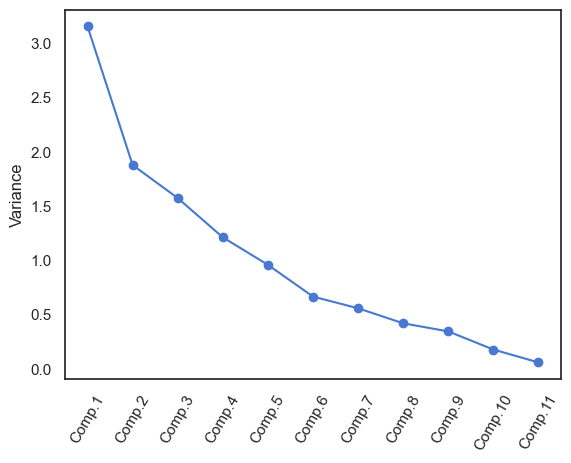

In [258]:
# GRÁFICO QUE MOSTRA PRINCIPALMENTE OS DOIS PRIMEIRO COMPONENTE EXPLICANDO MAIOR PARTE DO DATASET
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

 

screeplot(pca, x_std)